In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import tqdm

In [2]:
# Parameters
N = 100
J = 1
k_B = 1
STEPS = 500000
BURNIN = 50000  # Steps per field value
T = 2.0  # Temperature
B_vals = np.concatenate([np.linspace(-1, 1, 50), np.linspace(1, -1, 50)])  # Sweep up and down

In [3]:
# Initialize lattice
def initialize_lattice(N, mode="ordered"):
    if mode == "ordered":
        return np.ones((N, N))
    elif mode == "random":
        return np.random.choice([-1, 1], size=(N, N))

In [4]:
@numba.jit(nopython=True)
def metropolis(lattice, T, B, steps, J, k_B, burnin):
    N = lattice.shape[0]
    magnetization = 0.0
    num_accept = 0
    
    for step in range(steps):
        i, j = np.random.randint(N), np.random.randint(N)
        delta_E = 0

        for k, l in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
            i_neigh = (i + k) % N
            j_neigh = (j + l) % N
            delta_E += -J * -2 * lattice[i, j] * lattice[i_neigh, j_neigh] - B * lattice[i, j]

        if delta_E <= 0 or np.random.random() < np.exp(-delta_E / (k_B * T)):
            lattice[i, j] *= -1
            num_accept += 1

        magnetization += np.mean(lattice)

    return magnetization / (steps - burnin)

100%|██████████| 100/100 [08:41<00:00,  5.21s/it]


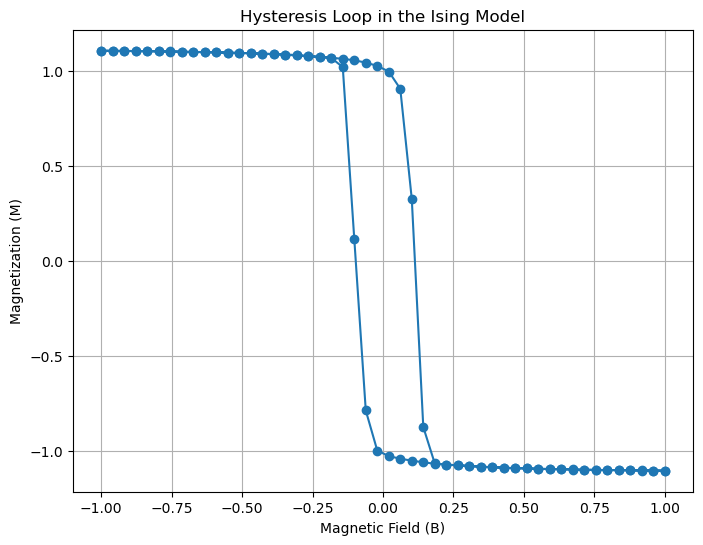

In [5]:
# Run simulation
lattice = initialize_lattice(N, mode="ordered")
M_vals = np.zeros(len(B_vals))

for i, B in tqdm.tqdm(enumerate(B_vals), total=len(B_vals)):
    M_vals[i] = metropolis(lattice, T, B, STEPS, J, k_B, BURNIN)

# Plot hysteresis
plt.figure(figsize=(8, 6))
plt.plot(B_vals, M_vals, marker="o", linestyle="-")
plt.xlabel("Magnetic Field (B)")
plt.ylabel("Magnetization (M)")
plt.title("Hysteresis Loop in the Ising Model")
plt.grid()
plt.show()